In [218]:
# Imports τα κατάλληλα εργαλεία και ανοίγω την φωτογραφία ως np.array
# Υπολογίζω το κέντρο της φωτογραφίας και φτιάχνω το 3x10201 array 
# που θα χρειαστούμε για να υπολογίσουμε που θα πάνε τα νέα σημεία.

import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

# opening the image, making it an array.
image_array = np.array(Image.open("brain.png"))

#center
rows, cols = image_array.shape
middle_rows = int (rows / 2)
middle_cols = int (cols / 2)


full_size = rows * cols
big_array = np.zeros((3,full_size))
big_array[2,:] = 1

print(big_array)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [219]:
# Εδώ θα προσθέσουμε τις τιμές στον big array. τους άξονες δηλαδή

i = 0
for col in range(cols) : # {
    for row in range(rows): #{
        big_array[0][i] = int(row - middle_rows)
        big_array[1][i] = int(col - middle_cols)
        i = i + 1
    #}
#}

print(big_array)

[[-50. -49. -48. ...  48.  49.  50.]
 [-50. -50. -50. ...  50.  50.  50.]
 [  1.   1.   1. ...   1.   1.   1.]]


In [220]:
# Εδώ θα υπολογίσω τον πίνακα του μετασχηματισμού που θέλω να κάνω.

#Αλλαγή των μεταβλητών εδω:
a = np.cos(np.pi/4)
b = -np.sin(np.pi/4)
c = 0
d = np.sin(np.pi/4)
e = np.cos(np.pi/4)
f = 0

affine_array = np.array([
    [a, b, c],
    [d, e, f],
    [0, 0, 1]
])

print(affine_array)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [221]:
# Εδώ θα κάνω τον υπολογισμό των πινάκων affine_array και big_array
# παίρνοντας έτσι που θα πρέπει να τοποθετηθούν τα νέα σημεία

new_big_array = affine_array @ big_array
print(new_big_array)


[[-7.10542736e-15  7.07106781e-01  1.41421356e+00 ... -1.41421356e+00
  -7.07106781e-01  7.10542736e-15]
 [-7.07106781e+01 -7.00035713e+01 -6.92964646e+01 ...  6.92964646e+01
   7.00035713e+01  7.07106781e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


In [222]:
# Εδώ θα φτιάξουμε ένα νέο array με τις τιμές που είχε η original φωτογραφία αλλά στις αλλαγμένες θέσεις

new_image_array = np.full((rows,cols), -10)
i = 0

for row in range (rows): 
#{
    for col in range (cols) : 
    #{
        x = new_big_array[0][i] + middle_rows
        y = new_big_array[1][i] + middle_cols
        
        if int(x) > rows-1 or int(y) > cols-1 or int(x) < 0 or int(y) < 0:
            i = i + 1
            continue
        
        new_image_array[row][col] = image_array[int(y)][int(x)]
        i = i + 1
    #} 
#}

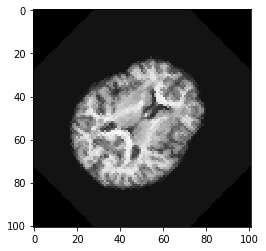

In [223]:
# Τυπώνουμε την νέα εικόνα
plt.imshow(new_image_array,cmap="gray")
plt.show()

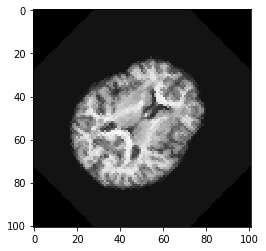

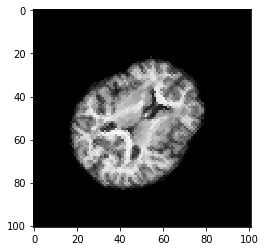

In [224]:
# Τώρα πρέπει να φτιάξουμε τα pixels της εικόνας που δεν έχουν σωστή τιμή 
# Θα χρησιμοποιηθεί η παρεμβολή κοντινότερου γείτονα.

helping_array = np.copy(new_image_array)

for row in range(rows) :
    for col in range(cols) :

        if helping_array[row][col] != -10 :
            continue
        else :
            i = 1
            while (True) : 
                x = row - i
                y = col - i
                z = row + i
                w = col + i

                # edges
                if row - i < 0 :
                    x = 0
                if col - i < 0 :
                    y = 0
                if row + i > rows - 1 :
                    z = rows - 1
                if col + i > cols - 1 :
                    w = cols - 1
                
                # check neighbors
                if helping_array[row][y] != -10:
                    new_image_array[row][col] = helping_array[row][y]
                    break
                elif helping_array[row][w] != -10:
                    new_image_array[row][col] = helping_array[row][w]
                    break
                elif helping_array[x][col] != -10:
                    new_image_array[row][col] = helping_array[x][col]
                    break
                elif helping_array[z][col] != -10:
                    new_image_array[row][col] = helping_array[z][col]
                    break
                elif helping_array[x][y] != -10:
                    new_image_array[row][col] = helping_array[x][y]
                    break
                elif helping_array[x][w] != -10:
                    new_image_array[row][col] = helping_array[x][w]
                    break
                elif helping_array[z][y] != -10:
                    new_image_array[row][col] = helping_array[z][y]
                    break
                elif helping_array[z][w] != -10:
                    new_image_array[row][col] = helping_array[z][w]
                    break
                else :
                    if (i > 10201): break
                    i = i + 1
            # while
        # if - else
    #for col
#for row

plt.imshow(helping_array,cmap="gray")
plt.show()

plt.imshow(new_image_array, cmap="gray")

plt.show()
